In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(658, 1194, 3)

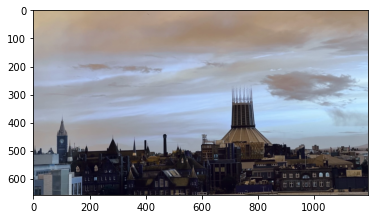

In [63]:
img = cv2.imread('../liverpool_church.jpeg')
plt.imshow(img)
img.shape

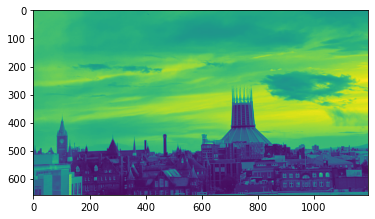

In [64]:
def process_image(image):
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

img_gray = process_image(img)
plt.imshow(img_gray)

In [65]:
def zero_padding(image, padding=0):
    # Apply Equal Padding to All Sides
    if padding != 0:
        image_padded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        image_padded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        image_padded = image
    return image_padded

def convolve_2d(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    x_kern_shape = kernel.shape[0]
    y_kern_shape = kernel.shape[1]
    x_img_shape = image.shape[0]
    y_img_shape = image.shape[1]

    # Shape of Output Convolution
    x_output = int(((x_img_shape - x_kern_shape + 2 * padding) / strides) + 1)
    y_output = int(((y_img_shape - y_kern_shape + 2 * padding) / strides) + 1)
    output = np.zeros((x_output, y_output))

    image_padded = zero_padding(image, padding)

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - y_kern_shape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - x_kern_shape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * image_padded[x: x + x_kern_shape, y: y + y_kern_shape]).sum()
                except:
                    pass

    return output

In [66]:
def test_zero_padding():
    mock = np.ones((10,10))
    padded = zero_padding(image=mock, padding=1)
    return padded

test_zero_padding()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

(658, 1194)
(658, 1194)


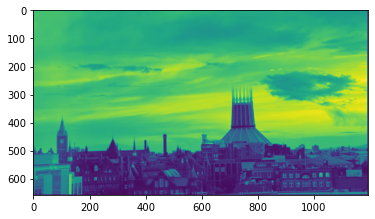

In [68]:
def test_convolve_2d():
    mock_kernel = np.ones((3,3))/9
    img_convolve = convolve_2d(image=img_gray, kernel=mock_kernel, padding=1)
    plt.imshow(img_convolve)
    print(img_gray.shape)
    print(img_convolve.shape)

test_convolve_2d()

# Q1.1